In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')  # Optional: for prettier plots


In [5]:
# Load the dataset
df = pd.read_csv('../data/student_dataset.csv')

# Display first 5 rows
df.head()


,Student_Names,Phone_No.,Math,Physics,Chemistry,Grade,Comment,Roll No.,School Name,Student Address
0,Donald Contreras,9208625450,76,84,54,B+,Good Pursuance,524613,Martin Luther School,"478 Mooney Park, New Valerie, VI 28836"
1,Joseph Horton,9886408555,91,75,78,A,Very Good Achivement,561635,Martin Luther School,"037 Matthew Shores, Greeneton, CA 98399"
2,Savannah Burns MD,9047592659,64,98,20,C,Below Average Achivement,560985,Martin Luther School,"96124 Lloyd Streets, Edwardmouth, DC 61677"
3,William Carter,9048473864,15,95,32,D,Poor Pursuance,535126,Martin Luther School,"11959 Clark Village, Ivanview, NH 43940"
4,John Rodriguez,9685225730,86,86,66,B+,Good Pursuance,559410,Martin Luther School,"051 Weaver Glen Apt. 724, West Davidborough, M..."


In [6]:
# Add synthetic attendance (if not present)
if 'Attendance (%)' not in df.columns:
    np.random.seed(42)
    df['Attendance (%)'] = np.random.randint(50, 101, size=len(df))

df.head()


,Student_Names,Phone_No.,Math,Physics,Chemistry,Grade,Comment,Roll No.,School Name,Student Address,Attendance (%)
0,Donald Contreras,9208625450,76,84,54,B+,Good Pursuance,524613,Martin Luther School,"478 Mooney Park, New Valerie, VI 28836",88
1,Joseph Horton,9886408555,91,75,78,A,Very Good Achivement,561635,Martin Luther School,"037 Matthew Shores, Greeneton, CA 98399",78
2,Savannah Burns MD,9047592659,64,98,20,C,Below Average Achivement,560985,Martin Luther School,"96124 Lloyd Streets, Edwardmouth, DC 61677",64
3,William Carter,9048473864,15,95,32,D,Poor Pursuance,535126,Martin Luther School,"11959 Clark Village, Ivanview, NH 43940",92
4,John Rodriguez,9685225730,86,86,66,B+,Good Pursuance,559410,Martin Luther School,"051 Weaver Glen Apt. 724, West Davidborough, M...",57


In [7]:
# Calculate average marks
df['Average_Marks'] = df[['Math', 'Physics', 'Chemistry']].mean(axis=1)

# Flag students at risk
df['At_Risk'] = ((df['Average_Marks'] < 40) | (df['Attendance (%)'] < 70))

df[['Student_Names', 'Average_Marks', 'Attendance (%)', 'At_Risk']].head()


,Student_Names,Average_Marks,Attendance (%),At_Risk
0,Donald Contreras,71.333333,88,False
1,Joseph Horton,81.333333,78,False
2,Savannah Burns MD,60.666667,64,True
3,William Carter,47.333333,92,False
4,John Rodriguez,79.333333,57,True


/Users/karthikthotakuri/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


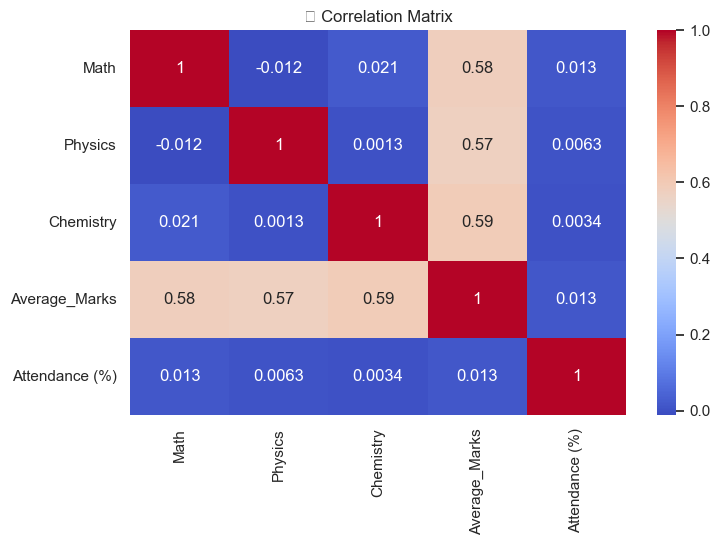

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Math', 'Physics', 'Chemistry', 'Average_Marks', 'Attendance (%)']].corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Matrix")
plt.show()


/var/folders/wv/6vfpjmgj41x6d3262tc57bgc0000gn/T/ipykernel_1389/3354717550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Average_Marks', y='Student_Names', palette='viridis')
/var/folders/wv/6vfpjmgj41x6d3262tc57bgc0000gn/T/ipykernel_1389/3354717550.py:7: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/Users/karthikthotakuri/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


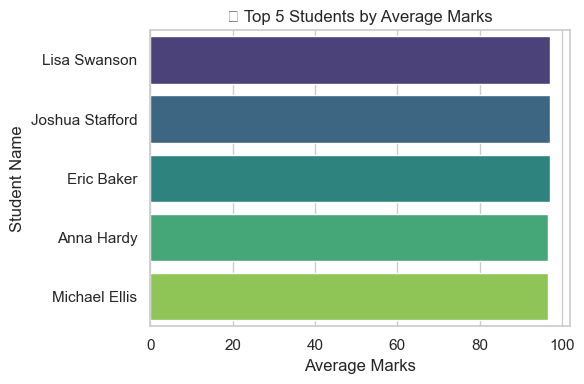

In [16]:
top5 = df.sort_values('Average_Marks', ascending=False).head(5)
plt.figure(figsize=(6,4))
sns.barplot(data=top5, x='Average_Marks', y='Student_Names', palette='viridis')
plt.title("🏅 Top 5 Students by Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Student Name")
plt.tight_layout()
plt.show()


/var/folders/wv/6vfpjmgj41x6d3262tc57bgc0000gn/T/ipykernel_1389/237562752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='At_Risk', data=df, palette='pastel')
/Users/karthikthotakuri/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


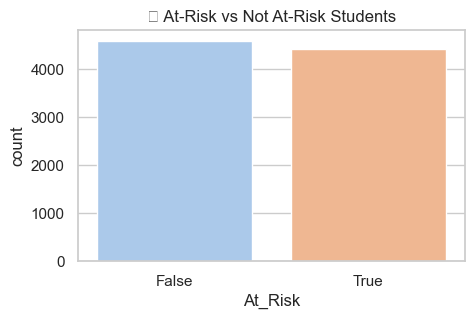

,Student_Names,Average_Marks,Attendance (%)
2,Savannah Burns MD,60.666667,64
4,John Rodriguez,79.333333,57
5,Natalie Nash,23.333333,70
7,Robert Perez,29.333333,68
9,Katherine Lambert,43.333333,60
...,...,...,...
8993,Dennis Romero,41.666667,66
8995,Kimberly Stevens,64.000000,64
8996,Kelsey Bonilla,71.666667,65
8997,Kelly Dunn,55.333333,64


In [17]:
at_risk = df[df['At_Risk'] == True]
plt.figure(figsize=(5,3))
sns.countplot(x='At_Risk', data=df, palette='pastel')
plt.title("🚨 At-Risk vs Not At-Risk Students")
plt.show()

# Display list
at_risk[['Student_Names', 'Average_Marks', 'Attendance (%)']]


In [19]:
# Save the modified dataset
df.to_csv('../data/student_dataset_cleaned.csv', index=False)


In [20]:
df.to_csv('student_dataset_cleaned.csv', index=False)


## 📌 Summary

- Created a synthetic `Attendance (%)` column.
- Computed `Average_Marks` from core subjects.
- Flagged students as **At Risk** if:
  - Average marks < 40 **OR**
  - Attendance < 70%
- Identified top performers and flagged students needing intervention.
